<a href="https://colab.research.google.com/github/vm00328/vm00328_coursework_com2025/blob/master/Copy_of_Copy_of_Copy_of_75_vm00328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=0abda8d4495c809324a9f2ee09fc2d75c958520d46c966fb6f5a50c1cb03c638
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladislavmanolov","key":"15fc1e040ee6a2157de9f9aa75acdf8c"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'uos-com2028'

 98% 811M/827M [00:04<00:00, 92.6MB/s]
100% 827M/827M [00:04<00:00, 196MB/s] 


In [ ]:
! unzip uos-com2028.zip -d COM2028_Coursework

Streaming output truncated to the last 5000 lines.
  inflating: COM2028_Coursework/train/train/5499.jpg  
  inflating: COM2028_Coursework/train/train/55.jpg  
  inflating: COM2028_Coursework/train/train/550.jpg  
  inflating: COM2028_Coursework/train/train/5500.jpg  
  inflating: COM2028_Coursework/train/train/5501.jpg  
  inflating: COM2028_Coursework/train/train/5502.jpg  
  inflating: COM2028_Coursework/train/train/5503.jpg  
  inflating: COM2028_Coursework/train/train/5504.jpg  
  inflating: COM2028_Coursework/train/train/5505.jpg  
  inflating: COM2028_Coursework/train/train/5506.jpg  
  inflating: COM2028_Coursework/train/train/5507.jpg  
  inflating: COM2028_Coursework/train/train/5508.jpg  
  inflating: COM2028_Coursework/train/train/5509.jpg  
  inflating: COM2028_Coursework/train/train/551.jpg  
  inflating: COM2028_Coursework/train/train/5510.jpg  
  inflating: COM2028_Coursework/train/train/5511.jpg  
  inflating: COM2028_Coursework/train/train/5512.jpg  
  inflating: COM20

In [ ]:
#Some necessary imports that are used throughout development
import keras
import numpy as np
from numpy.random import seed
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from cv2 import cv2

from keras.preprocessing.image import ImageDataGenerator

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from google.colab import files
from keras. utils import to_categorical

from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline

In [ ]:
import csv
files_ids = []
prefix = '/content/COM2028_Coursework/'
with open('{}train.txt'.format(prefix)) as file:
    reader = csv.reader(file, delimiter=' ')
    for row in reader:
        files_ids.append(row)
files_ids = [[prefix+'train/'+x,y] for (x,y) in files_ids]
print(files_ids[:10])

[['/content/COM2028_Coursework/train/train/0.jpg', '5'], ['/content/COM2028_Coursework/train/train/1.jpg', '21'], ['/content/COM2028_Coursework/train/train/2.jpg', '18'], ['/content/COM2028_Coursework/train/train/3.jpg', '2'], ['/content/COM2028_Coursework/train/train/4.jpg', '22'], ['/content/COM2028_Coursework/train/train/5.jpg', '3'], ['/content/COM2028_Coursework/train/train/6.jpg', '15'], ['/content/COM2028_Coursework/train/train/7.jpg', '7'], ['/content/COM2028_Coursework/train/train/8.jpg', '1'], ['/content/COM2028_Coursework/train/train/9.jpg', '15']]


In [ ]:
image_size = 128
def read_and_reisze_image(image_path):
    im = cv2.imread(image_path)
    im_resized = cv2.resize(im, (image_size, image_size), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    return im_converted

In [ ]:
image_data = []
y_train = []
for image_path, label in tqdm(files_ids):
    image_data.append(read_and_reisze_image(image_path))
    y_train.append(label)

100%|██████████| 10270/10270 [00:34<00:00, 300.12it/s]


In [ ]:
x_train = image_data
x_train = np.array(x_train)
image_data = 0
y_train = to_categorical(y_train)
x_train = x_train.reshape(-1, image_size,image_size, 3)
x_train = x_train.astype('float32')
x_train = x_train/255

In [ ]:
print(x_train.shape)
print(y_train.shape)
y_train[0]
x_train[0]

(10270, 128, 128, 3)
(10270, 23)


array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.99607843, 0

In [ ]:
#Data Augmentation
imgGenerator = ImageDataGenerator(
    shear_range = 0.25,
    zoom_range = 0.25,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # dimesion reduction
    rotation_range=5,  # randomly rotate images in the range 5 degrees
    width_shift_range=0.1,  # randomly shift images horizontally 10%
    height_shift_range=0.1,  # randomly shift images vertically 10%
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False, # randomly flip images
    validation_split = 0.1
    )  
#imgGenerator.fit(x_train)
batch_size = 64
train_generator = imgGenerator.flow(x_train, y_train, batch_size=batch_size, subset = 'training')
val_generator = imgGenerator.flow(x_train,y_train, batch_size=batch_size, subset='validation')

#Splitting the data into a training and testing set
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42, test_size=0.1)

In [ ]:
print('Training Data:')
print(x_train.shape)
print(y_train.shape)

print('Validation Data:')
print(x_val.shape)
print(y_val.shape)

Training Data:
(10270, 128, 128, 3)
(10270, 23)
Validation Data:
(1027, 64, 64, 3)
(1027, 23)


In [ ]:
#Building the model
model = Sequential()
model.add(Convolution2D(64, kernel_size = 3, activation='relu', input_shape=(image_size, image_size, 3)))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))

model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
#model.add(Dense(64, activation='relu'))

model.add(Convolution2D(128, kernel_size = 3, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(23, activation='softmax'))

In [ ]:
#Setting the learning rate to a small value
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
accuracy = keras.metrics.CategoricalAccuracy()

#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Printing a summary of the model for vizualization purposes
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 39, 39, 64)        36928     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)       

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, min_lr=0.00001)

In [ ]:
#Fitting the model
my_model = model.fit(train_generator, callbacks=[reduce_lr], validation_data=(val_generator), epochs=70, batch_size=64)
#tf.convert_to_tensor()

Epoch 1/70
145/145 [==============================] - 41s 268ms/step - loss: 2.7533 - accuracy: 0.1769 - val_loss: 2.4195 - val_accuracy: 0.2882
Epoch 2/70
145/145 [==============================] - 38s 260ms/step - loss: 2.3446 - accuracy: 0.3059 - val_loss: 2.1307 - val_accuracy: 0.3759
Epoch 3/70
145/145 [==============================] - 38s 260ms/step - loss: 2.0990 - accuracy: 0.3637 - val_loss: 1.9355 - val_accuracy: 0.4129
Epoch 4/70
145/145 [==============================] - 38s 260ms/step - loss: 1.9419 - accuracy: 0.4074 - val_loss: 1.8592 - val_accuracy: 0.4382
Epoch 5/70
145/145 [==============================] - 38s 261ms/step - loss: 1.7801 - accuracy: 0.4515 - val_loss: 1.6775 - val_accuracy: 0.5131
Epoch 6/70
145/145 [==============================] - 38s 260ms/step - loss: 1.7089 - accuracy: 0.4733 - val_loss: 1.6031 - val_accuracy: 0.5131
Epoch 7/70
145/145 [==============================] - 38s 263ms/step - loss: 1.5716 - accuracy: 0.5186 - val_loss: 1.5956 - val_ac

In [ ]:
loss_and_metrics = model.evaluate(val_generator, verbose=2)
print("Test Loss:", loss_and_metrics[0])
# Evaluating the model accuracy in percents
print("Model Accuracy:", loss_and_metrics[1] * 100, "%")

17/17 - 3s - loss: 1.0714 - accuracy: 0.6884
Test Loss: 1.0714300870895386
Model Accuracy: 68.84128451347351 %


In [ ]:
# Making a prediction of the validation data
y_pred_val = model.predict(x_val)

y_pred_val = np.argmax(y_pred_val, axis=1)

In [ ]:
print('Printing the first element of Y_test')
y_val[0]

Printing the first element of Y_test


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Returning max value's index on axis 1
y_val = np.argmax(y_val, axis=-1)

#Printing the first element of the new y_val
y_val[0]

7

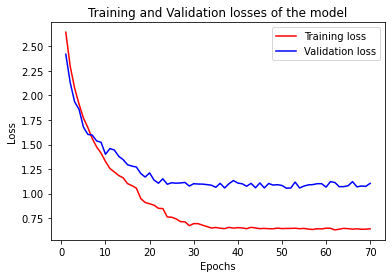

In [ ]:
loss_train = my_model.history['loss']
loss_val = my_model.history['val_loss']
epochs = range(1,71)
plt.plot(epochs, loss_train,'r', label='Training loss')
plt.plot(epochs, loss_val,'b', label='Validation loss')
plt.title('Training and Validation losses of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

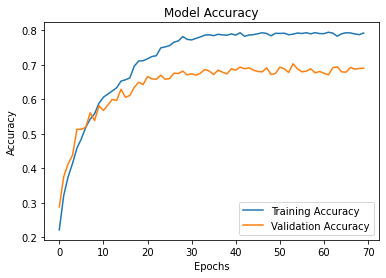

In [ ]:
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
#Defining confusion matrix

cm = confusion_matrix(y_true=y_val, y_pred=y_pred_val)

TypeError: ignored

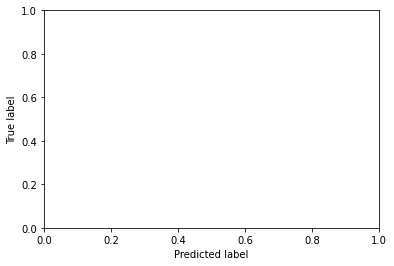

<Figure size 432x288 with 0 Axes>

In [ ]:
#Creating a confusion matrix function for visualisation purposes

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
       print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white"if cm[i, j] > thresh else"black")
 
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_val, y_val)
np.set_printoptions(precision=2)

#Plotting the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

In [ ]:
#Creating the .csv file
col = pd.read_csv("COM2028_Coursework/submission_sample.csv")
col["label"] = y_val
col.to_csv("COM2028_Coursework/vm00328_CW_AI.csv", index=False)
#df.to_csv('filename.csv') 
#files.download('COM2028_Coursework/submission_sample.csv')

ValueError: ignored